# Rapport de projet Kaggle - Digit Recognizer

Auteur : Nasseha Sadim-Salim et Ariinui TERIITEHAU

Le but du projet est de reconnaitre des chiffres manuscrites à l'aide de classifieur de Machine Learning 
sur deux base de données, une avec une base de petite dimension (8*8) et autre de grande dimension. Afin de comparer l'efficacité des classifieurs sur les deux bases. 


Voir le overfitting and underfitting entre le test et train 

Linear decision boundaries / faire des graphiques pour voir quels classifieurs permet de mieux séparer les observations 

Linear classifications : prediction 

## Importation des parkages
Nous importons un jeu de données digits provenant de "sklearn.datasets". 
C'est une base avec des dimensions plus faible que le MNIST. Ce même jeu de données 
se présente tel qu'une ligne représente un chiffre et une colonne a un point du pixel. 

In [4]:
%matplotlib inline                      

import numpy as np                      # charge un package pour le numérique
import matplotlib.pyplot as plt         # charge un package pour les graphiques


# Chargement des données disponible dans le package sklearn
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

### Description des données 

Nous pouvons voir qu'il y a 64 pixels qui sont équivalents aux colonnes et il y a 1797 observations dans le jeu de données. 

In [5]:
print("Nombre de pixels :      {}".format(X.shape[1]))
print("Nombre d'observations : {}".format(X.shape[0]))
print("Nombre de classes :     {}".format(len(np.unique(y)))) 
#nb.unique(y) renvoi un vecteur des labels unique existant
#len() renvoi la taille du vecteur 

# Choix d'une observation quelconques de la base
idx_to_test = 60

print("Affichage d'une ligne de la matrice / image:")
print(X[idx_to_test, :])
print("Affichage de la classe / chiffre associé:")
print(y[idx_to_test])

Nombre de pixels :      64
Nombre d'observations : 1797
Nombre de classes :     10
Affichage d'une ligne de la matrice / image:
[ 0.  0. 10. 15. 14.  4.  0.  0.  0.  0.  4.  6. 13. 16.  2.  0.  0.  0.
  0.  3. 16.  9.  0.  0.  0.  0.  0.  1. 16.  6.  0.  0.  0.  0.  0.  0.
 10. 12.  0.  0.  0.  0.  0.  0.  1. 16.  4.  0.  0.  1.  9.  5.  6. 16.
  7.  0.  0.  0. 14. 12. 15. 11.  2.  0.]
Affichage de la classe / chiffre associé:
3


In [6]:
print((np.unique(y)))

[0 1 2 3 4 5 6 7 8 9]


## Illustration et analyses des données
Nous allons visualiser les données et réaliser la moyenne, variance et maximum des données selon les 10 labels (0 à 9)

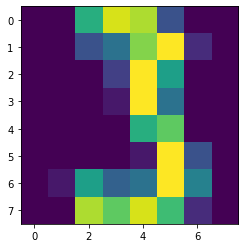

In [7]:
# Utilisation de la fonction imshow pour l'affichage de l'image numéro idx_to_test:
imgplot = plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)))
#la fonction plt.imshow permet d'avoir une sortie 
#d'un graphique pixelisé en couleur 

#la fonction "np.reshape" permet de créer une nouvelle forme de 
#la ligne d'observation sans changer les données

Text(0.5, 1.0, 'Le chiffre numéro 60 est un 3')

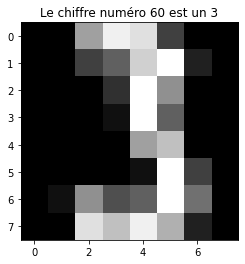

In [8]:
# Amélioration de la visualisation (niveau de gris) et de la légende:
imgplot = plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)),
                     cmap='gray', aspect='equal', interpolation='nearest')

# Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
plt.title(u'Le chiffre numéro %s est un %s' % (idx_to_test, y[idx_to_test]))

Liste des classes en présence:  [0 1 2 3 4 5 6 7 8 9]


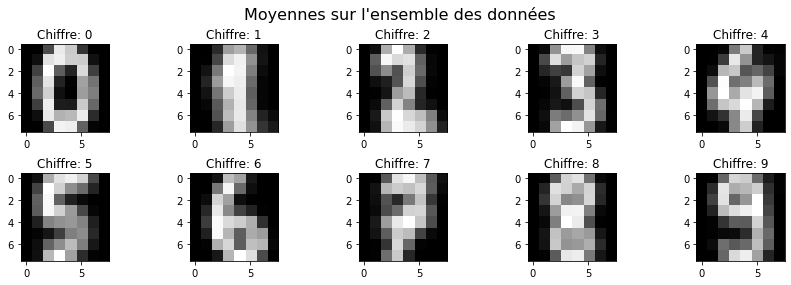

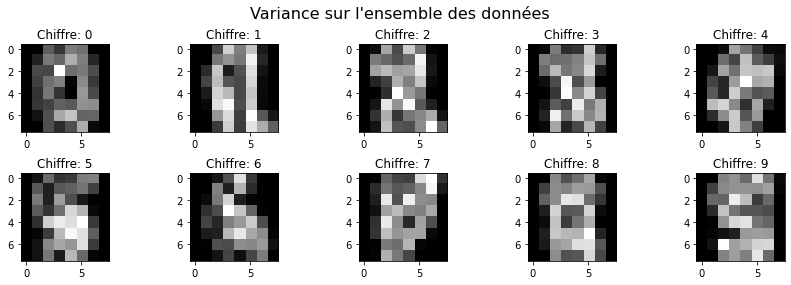

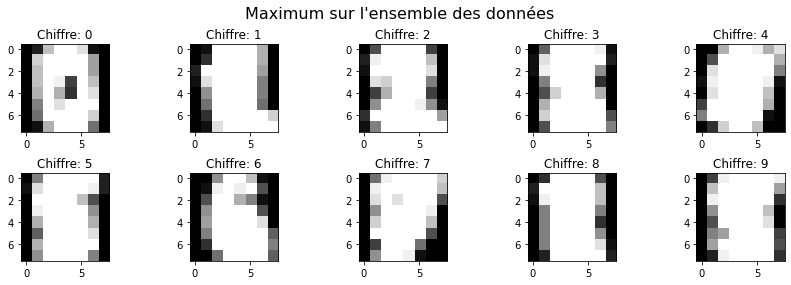

In [9]:
#Fonction affichage 
def disp_pics(pic_list, title=''):
    """" Fonction qui affiche une liste d'image codée en vecteur """""
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 4)) #creation d'une matrice de 2*5
    plt.suptitle(title, fontsize=16)
    for i in range(10):
        opt = dict(cmap='gray', aspect='equal', interpolation='nearest')
        axs.flat[i].imshow(pic_list[i].reshape(8, 8), **opt)
        axs.flat[i].set_title("Chiffre: %s" % i)
    # Contre-balancer l'affichage pas terrible de matplotlib
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    
    
    
# Récupérer les modalités possible prises (Il y en a bien 10!) 
classes_list = np.unique(y).astype(int)
print ("Liste des classes en présence: ", classes_list)    

# Calculer un représentant moyen pour chaque chiffre 
Xi_mean = [np.mean(X[y == cls], axis=0) for cls in classes_list]  #boucle pour chaque valeur dans classes_list  
# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_mean, title=(u"Moyennes sur l'ensemble des données"))

# Calculer un représentant max pour chaque chiffre 
Xi_mean = [np.var(X[y == cls], axis=0) for cls in classes_list]    
# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_mean, title=(u"Variance sur l'ensemble des données"))

# Calculer un représentant max pour chaque chiffre 
Xi_mean = [np.max(X[y == cls], axis=0) for cls in classes_list]   
# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_mean, title=(u"Maximum sur l'ensemble des données"))

# Classification du labels 
Création d'une nouvelle base de données : X_train, X_test, y_train, y_test



In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6,
                                                    random_state=0)
print("Nb d'échantillons d'apprentissage (train) :  {}".format(X_train.shape[0]))
print("Nb d'échantillons de validation (test):    {}".format(X_test.shape[0]))

Nb d'échantillons d'apprentissage (train) :  1078
Nb d'échantillons de validation (test):    719


## Mesures de performances

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Importation des classifeurs 

In [12]:
#svm.linearSVC
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, r2_score
from sklearn.svm import SVC



# Liste des classifieurs 

Nous avons choisi des classifieurs KNN, SVM selon c (la pondération), Gaussien (rbf et gamma auto)

In [18]:


# Chargement d'une autre méthode de classification (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Liste des classifieurs évalués
classifiers = [('KNN_k=1', KNeighborsClassifier(n_neighbors=1)),
              ('SVM linear SVC c=1', svm.SVC(kernel='linear', C = 1.0)),
              ('SVM linear SVC c=100', svm.SVC(kernel='linear', C = 100.0)),
               ('svm_gauss1', SVC(kernel="rbf", gamma="auto", C=1)),
               ('svm_gauss1e6', SVC(kernel="rbf", gamma="auto", C=1e6)),
               ('SVM_SVC',SVC(gamma='scale'))
              ]





In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd        # charge un package pour le traitement des données
from timeit import timeit  # charge un package pour des mesures de temps
from sklearn.model_selection import cross_val_score

# Definition des métriques de performance
def perf_compute(clf, name, loops=10):
    """
    Calcule le temps d'apprentissage, de prediction, le score
    et la matrice de confusion d'un classifieur
    """
    # On initialise le conteneur
    perf = pd.Series(name=name,dtype=pd.StringDtype())
    # On crée les callables qu'on passera à la fonction de profiling
    fit = lambda: clf.fit(X_train, y_train)
    score_train = lambda: clf.score(X_train, y_train)
    score_test = lambda: clf.score(X_test, y_test)
    score_val_cross_train = cross_val_score(clf,X_train,y_train,cv=5)
    score_val_cross_test = cross_val_score(clf,X_test,y_test,cv=5)

    # On profile le temps des phases d'entrainement et de prédiction en ms
    perf['train_tps'] = timeit(fit, number=loops) / loops * 1000
    perf['test_tps'] = timeit(score_test, number=loops) / loops * 1000
    perf['total_tps'] = perf.train_tps + perf.test_tps
    # On calcule le score en pourcentage
    perf['score_test'] = fit().score(X_test, y_test) * 100
    # On calcule la matrice de confusion
    perf['conf_mat'] = [confusion_matrix(fit().predict(X_test), y_test)]
    # Normalisation par ligne de la matrice de confusion  pour avoir des pourcentages d'erreurs.
    # cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    perf['cross_val_test'] = score_val_cross_test.mean()*100
    perf['cross_val_train'] = score_val_cross_train.mean()*100

    return perf




In [40]:
# On lance le calcule de performance. On profile en bouclant 100 fois
perfs = pd.DataFrame([perf_compute(clf, name) for name, clf in classifiers])
perfs = perfs.sort_values(by='score_test')#trie par rapport au score test 

perfs['train_tps test_tps total_tps score_test cross_val_test cross_val_train'.split()].T

,svm_gauss1,svm_gauss1e6,SVM linear SVC c=1,SVM linear SVC c=100,KNN_k=1,SVM_SVC
train_tps,174.016303,175.492517,17.994276,18.511250,1.719704,36.764427
test_tps,53.858819,55.879769,13.232754,13.165701,69.763193,26.089923
total_tps,227.875122,231.372286,31.227030,31.676952,71.482898,62.854350
score_test,35.465925,40.611961,97.496523,97.496523,98.748261,98.887344
cross_val_test,16.413170,19.612471,96.800699,96.800699,97.633061,97.634033
cross_val_train,37.468562,41.088717,97.216624,97.216624,98.793282,98.329457


# Affichage de la matrice de confusion 
Cette matrice nous permet d'avoir une vision plus claire sur les prédictions faites avec les classifieurs. 
avec le pire modèle et le meilleur modèle en utilisant le critère de score

In [44]:
print(perfs['conf_mat'][1])

[array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  0,  0],
       [15, 52, 50, 31, 63, 86, 37, 27, 77, 52],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 22]])]


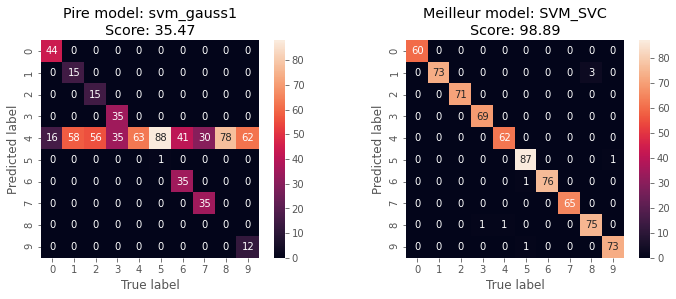

In [46]:
import seaborn as sns

def plot_conf_mat(perf, ax, title='Model'):
    """
    Affichage de la matrice de confusion
    """
    sns.heatmap(perf.conf_mat[0], ax=ax, square=True, annot=True)
    ax.set_title('{}: {}\nScore: {:.2f}'.format(title, perf.name, perf.score_test))
    ax.set_xlabel('True label')
    ax.set_ylabel('Predicted label')

# Affichage du plus mauvais et du meilleur classifieur
# Les classifieurs sont classés par scores croissant
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
plot_conf_mat(perfs.iloc[0], ax=axs[0], title='Pire model')
plot_conf_mat(perfs.iloc[-1], ax=axs[1], title='Meilleur model')

# Idée 
Ajouter des graphiques des boundaries linear pour montrer que SVM_gauss n'est pas le mieux pour ce type de problèmatique 

# Conclusion 

Mettre une conclusion ... À suivre